In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from PostageStampMaker import PostageStampMaker, create_postage_stamps
from Display import render_fits_image
%matplotlib inline

plt.ion()
plt.rcParams['figure.figsize'] = (10, 10)

exposure_file1 = os.path.join('/Users/Bryce/Documents/DESC/Twinkles/', 'data', '0,0.fits')
#exposure_file1 = os.path.join('/Users/Bryce/Documents/DESC/Twinkles/', 'data', 'lsst_e_185870_f2_R22_S11_E000.fits')
#exposure_file2 = os.path.join('/Users/Bryce/Documents/DESC/Twinkles/', 'data', 'lsst_e_195056_f2_R22_S11_E000.fits')
#exposure_file3 = os.path.join('/Users/Bryce/Documents/DESC/Twinkles/', 'data', 'lsst_e_203005_f2_R22_S11_E000.fits')
#exposure_file4 = os.path.join('/Users/Bryce/Documents/DESC/Twinkles/', 'data', 'lsst_e_204754_f2_R22_S11_E000.fits')
#exposure_file5 = os.path.join('/Users/Bryce/Documents/DESC/Twinkles/', 'data', 'lsst_e_213178_f2_R22_S11_E000.fits')
#exposure_file6 = os.path.join('/Users/Bryce/Documents/DESC/Twinkles/', 'data', 'lsst_e_215604_f2_R22_S11_E000.fits')

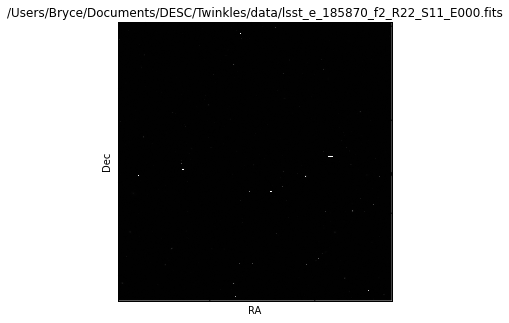

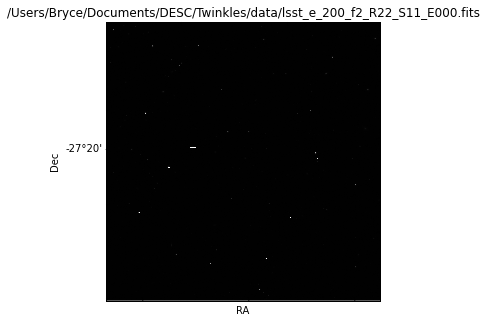

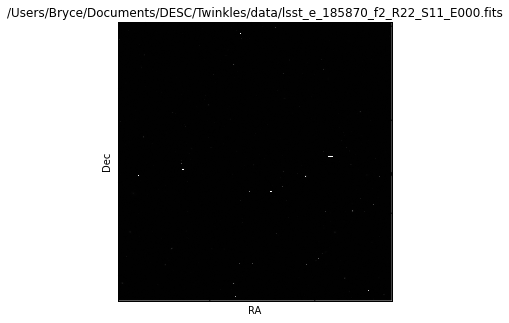

In [16]:
# Display the test image.
image1 = fits.open(exposure_file1)
image2 = fits.open(exposure_file2)
#fig = plt.figure()
#fig.add_subplot(2,1,1)
render_fits_image(image1[0], title=exposure_file1)
#fig.add_subplot(2,1,2)
render_fits_image(image2[0], title=exposure_file2)

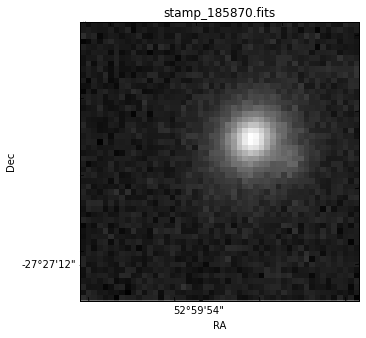

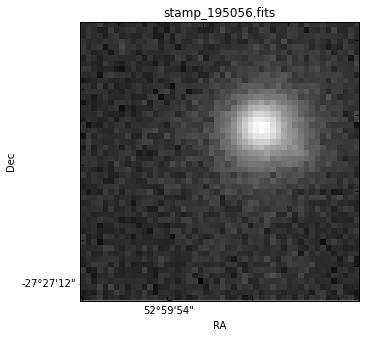

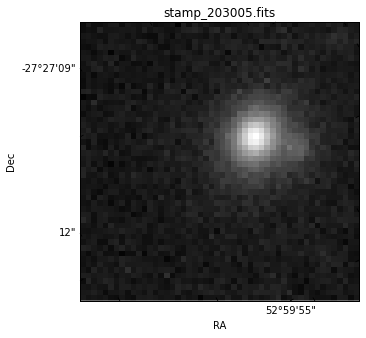

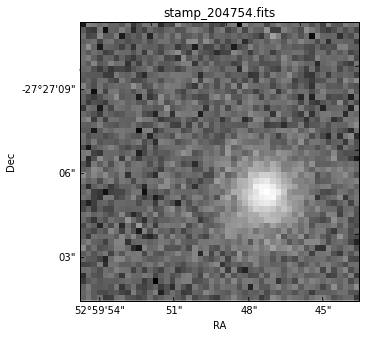

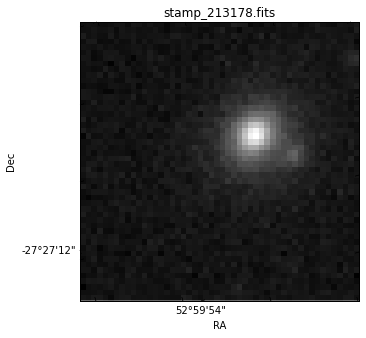

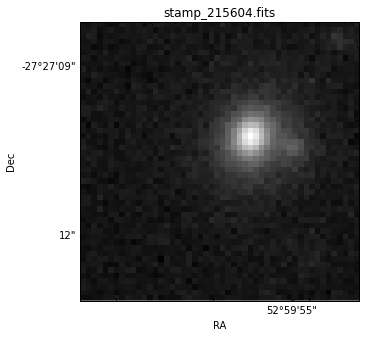

In [52]:
# Create a series of postage stamps from a list of 5 Exposure
# FITS files (using the test image as a proxy for all five) 
# and display each.
plt.rcParams['figure.figsize'] = (5, 5)
#expfiles = [exposure_file1]
dataFolder = '/Users/Bryce/Documents/DESC/Twinkles/data/eimages/'
expfiles=[]
for fileName in os.listdir(dataFolder):
    expfiles.append(str(dataFolder+fileName))
obshistid = [185870,195056,203005,204754,213178,215604]
#expfiles = [exposure_file1, exposure_file2, exposure_file3, exposure_file4, exposure_file5, exposure_file6]
#loc0 = [52.9252737, -27.5212009]
#loc1 = [52.9252926, -27.5212805]
#loc2 = [52.9251705, -27.5209601]
#loc0 = [52.9230946, -27.4559684]
#loc1 = [52.9231271, -27.4560618]
#loc2 = [52.9228961, -27.4557334]
#loc1 = [52.9228961, -27.4557334]
#loc2 = [52.9231271, -27.4560618]
#loc0 = [53.0142701, -27.3829505]
#loc0 = [53.1068, -27.382]
loc0 = [52.9968499, -27.4517142]
#loc0 = [53.21, -27.525]
ra = [loc0[0]]#, loc1[0], loc2[0]]
dec = [loc0[1]]#, loc1[1], loc2[1]]
size = 10
for ra_i, dec_i in zip(ra,dec):
    stamps = create_postage_stamps(ra_i, dec_i, size, expfiles)
    for i, stamp in enumerate(stamps):
        outfile = 'stamp_%i.fits' % obshistid[i]
        stamp.writeFits(outfile)
        fits_obj = fits.open(outfile)
        fig = render_fits_image(fits_obj[1], title=outfile)
        plt.savefig('stamp_%i.png' % (i)) 